## "likes" Report grade analysis
Having graded all the submissions for the "likes" Report assignment, a decision needs to be made.
1. How did the class do on this first assignment?
2. Are there any concerns present in the data?
3. Is some action needed (like an assignment correction)?

For this analysis, the assignment scores were downloaded from Blackboard. The student information was stripped from the data using Excel. In addition, the scores were randomized in Excel after downloading the data from Blackboard. This means that the normally-alphabetical data now has no association with student names or ID number.

### Analysis Plan
To analyze the data, the assignment scores will be loaded into the working environment and converted to a single-column DataFrame object. The univariate distribution will be assessed by plotting a histogram. Outliers will be assessed and descriptive statistics (mean, median, standard deviation) will be calculated before and after any outliers are removed. In addition, a probability plot will show how well the grades match a normal distribution.

### Setting up the Environment
The following libraries will be used:
- scipy.stats
- pandas
- matplotlib.pyplot

In [1]:
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt

The grade data was exported as a CSV from Blackboard. The pandas library provides the `read_csv()` function to load CSV data as a DataFrame.

In [2]:
filepath = r'D:\EMAT_22110\EMAT22110\likes_grades.csv'
l_grades = pd.read_csv(filepath)
print(len(l_grades))
l_grades.head()

24


,likes_grades
0,145
1,95
2,141
3,100
4,0


### Univariate Distribution
The distribution of the grades is plotted using pyplot's `hist()` function.

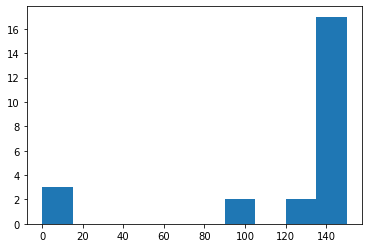

In [3]:
grades_hist = plt.hist(l_grades['likes_grades'])

The maximum points possible for this assignment was 150 points. The defaults for the `hist()` function lack much detail between scores above 130. However, we can see three clear outliers at 0. After going back to Blackboard these three 0s are accurate, but fall well outside the norm for the class.

A second DataFrame will help plot the values other than zero and compare the descriptions of the data with and without the 0 scores.

In [4]:
l_grades_no_zeros = l_grades.loc[l_grades['likes_grades'] > 0]
print(len(l_grades_no_zeros))
l_grades_no_zeros.head()

21


,likes_grades
0,145
1,95
2,141
3,100
5,150


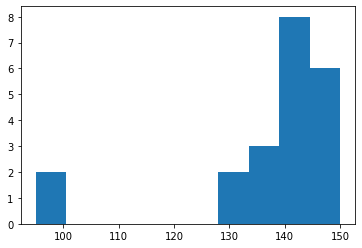

In [5]:
grades_no_zeros_hist = plt.hist(l_grades_no_zeros['likes_grades'])

### Descriptive Statistics
From scipy.stats, the `describe()` function provides the mean, standard deviation, minimum and maximum values, and measures of normality. Also from scipy.stats, `mode()` calculates the mode. The `probplot()` function shows the data against an ideal normal distribution. If the observed values (the blue dots) fit closely with the theoretical probability line (in red), then the data matches a normal distribution. Deviations from the probability line show how the data is different from normal.
We will compute these for both the full data and for the data without the zero values.

`describe()` returns a DescribeResult object, from which we can call the specific stats of interest.

`mode()` returns a similar object called ModeResults. Calling `.mode[0]` returns just the value of the mode.

In [6]:
type(stats.describe(l_grades['likes_grades']))

scipy.stats.stats.DescribeResult

In [7]:
type(stats.mode(l_grades['likes_grades']))

scipy.stats.stats.ModeResult

#### Description of the full data
The number of observations is:

In [8]:
stats.describe(l_grades['likes_grades']).nobs

24

The mean is:

In [9]:
stats.describe(l_grades['likes_grades']).mean

120.16666666666667

The variance is:

In [10]:
stats.describe(l_grades['likes_grades']).variance

2327.536231884058

The minimum and maximum values are:

In [11]:
stats.describe(l_grades['likes_grades']).minmax

(0, 150)

The mode is:

In [12]:
stats.mode(l_grades['likes_grades']).mode[0]

141

The quantile ranges are:

In [13]:
stats.mstats.mquantiles(l_grades['likes_grades'])

array([129.9 , 141.  , 144.55])

Plotting the probability of the scores shows large deviations from a normal distribution, especially at the lower tail.

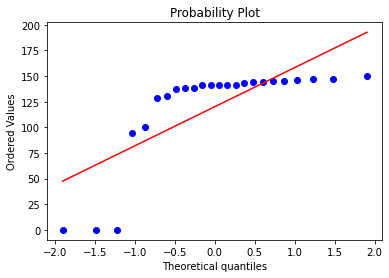

In [14]:
ax1 = plt.subplot()
res = stats.probplot(l_grades['likes_grades'], plot = plt)
plt.show()

#### Description of the data without zeros
The number of observations is:

In [15]:
stats.describe(l_grades_no_zeros['likes_grades']).nobs

21

The mean is:

In [16]:
stats.describe(l_grades_no_zeros['likes_grades']).mean

137.33333333333334

The variance is:

In [17]:
stats.describe(l_grades_no_zeros['likes_grades']).variance

201.23333333333335

The minimum and maximum values are:

In [18]:
stats.describe(l_grades_no_zeros['likes_grades']).minmax

(95, 150)

The mode is:

In [19]:
stats.mode(l_grades_no_zeros['likes_grades']).mode[0]

141

The quantile ranges are:

In [20]:
stats.mstats.mquantiles(l_grades_no_zeros['likes_grades'])

array([137.7, 141. , 145. ])

Plotting the probability of the scores still shows large deviations from a normal distribution, especially at the lower tail. However, it is closer to normal.

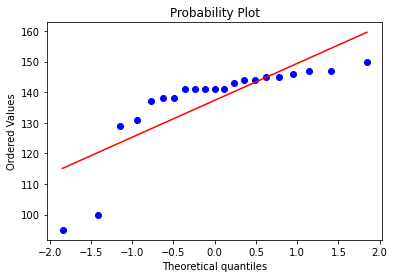

In [21]:
ax2 = plt.subplot()
res = stats.probplot(l_grades_no_zeros['likes_grades'], plot = plt)
plt.show()

### Conclusions
Depending on how we treat the zeros in the data set, we get slightly different views of the class performance on this first assignment. The average percentage with the zeros included is an 80.1%, that is a B-.

In [22]:
stats.describe(l_grades['likes_grades']).mean/150*100

80.11111111111111

This is a bit lower than I personally hope for in this assignment. In general, I aim to create assignments that have about a B average, with plenty of students able to score in the A- to A range.

When we remove the zeros from the data set, we get a slightly higher average percentage of 91.5%, or an A-.

In [23]:
stats.describe(l_grades_no_zeros['likes_grades']).mean/150*100

91.55555555555556

We do see that the the most frequent score (the mode) is the same whether we include the zeros or not. It is 94% or right above the threshold for an A.

Modal percentage including zeros:

In [24]:
stats.mode(l_grades['likes_grades']).mode[0]/150*100

94.0

Modal percentage not excluding zeros:

In [25]:
stats.mode(l_grades_no_zeros['likes_grades']).mode[0]/150*100

94.0

#### A difficult decision
It is clear that many people were successful with this assignment, in fact most people did just very well. This tells me that there were few systematic errors in this assignment as an assessment of student performance in the class so far.

However, there were a handful of students that underperformed. In this case, I consider under performance as falling below the lower third quantile without considering the zero scores. This cutoff value for this quantile is 137. Eight students fall at or below this cutoff.

In [26]:
print(l_grades.loc[l_grades['likes_grades'] <= 137].size)
l_grades.loc[l_grades['likes_grades'] <= 137]

8


,likes_grades
1,95
3,100
4,0
10,131
12,0
14,137
19,0
21,129


So, how do we provide a fair way to reward those who met the assignment goals while allowing for grace in this first major assignment?

__Here's a proposal__: For all students, I will allow the option (not required) to resubmit the "likes" Report for up to half credit back on the missed points. So, someone who earned a 0 can improve their score up to 75 points, a 50%. Someone how earned a 137 can improve their score by up to 6.5 points $(150-137)/2 = 6.5$, a 95.6%. If everyone took advantage of this, what would the normal distribution look like?

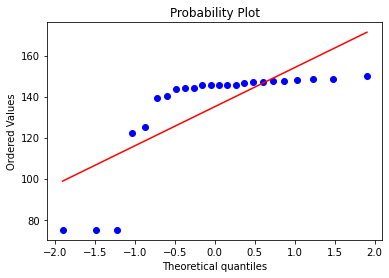

In [27]:
ax3 = plt.subplot()
res = stats.probplot(((150-l_grades['likes_grades'])/2)+l_grades['likes_grades'], plot = plt)
plt.show()

This slightly improves the distribution of scores, but we still see as large of deviations at the lower tail.

__A second proposal__: Instead of looking at the lowest quantile, let's examine the data without the upper two quantiles. 50% of students earned a 141 or better. Those who earned this high essentially maxed out on the assessment. This arbitrarily truncating the distribution of the data.

For example, imagine we had a bathroom scale that only measured weight up to 170 pounds. If we weighted everyone, our distribution would cut off at that point and we would see a grouping of values right at 170. We see a similar patter in this grade data.

With this consideration, let's look again at the distribution of scores for those who score below 141.

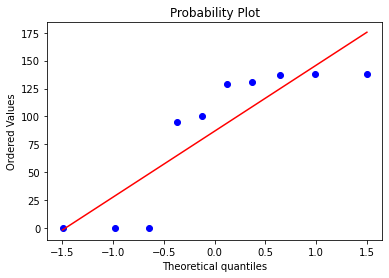

In [28]:
l_grades_no_top = l_grades.loc[l_grades['likes_grades'] < 141]
ax4 = plt.subplot()
res = stats.probplot(l_grades_no_top['likes_grades'], plot = plt)
plt.show()

This is much closer to normal! In fact, for such a small sample size, this is surprisingly normal.

We still have one issue, however, the mean is lower than desired at a 57.9%

In [29]:
stats.describe(l_grades_no_top['likes_grades']).mean/150*100

57.86666666666667

So let's try to get this mean up with the solution proposed above.

In [30]:
stats.describe(((150-l_grades_no_top['likes_grades'])/2)+l_grades_no_top['likes_grades']).mean/150*100

78.93333333333334

So, if students could earn back half credit of the points they missed, the average grade for the lowest scoring half of the class moves from 57% to a much more generous 78.9%, or a C+.

For me, this is a fair solution. It still requires more work for those who did not do well on the first assignment. Those with less to fix can earn back some points with minimal effort. And those who already earned an A on the assignment can focus on other things.